### **PROJET STATISTIQUE MASTER 1 SCIENCE DES DONNEES ET APPLICATIONS**

### **AUTEURS** :

- ## Mbery Sene GNING (IIA)
- ## MOR MBEUGUE (CAA)
- ## Oumou BALDE (IIA)
- ## Dieynaba Amadou BA (SEM)

## Professeur: M. GNING

    




## PLAN

# 1- **Exercice 1 Simulation de lois**


# 2- **Exercice 2 Méthode de Monte Carlo**


# 3- **Exercice 3**


# 4- **Exercice 4 (Données covid-19 Sénégal)**


# **EXERCICE 1 Simulation de lois**

# **I. LOI BINOMIALE 𝐵(30,0.5)**
### La loi binomiale modélise le nombre de succès dans n essais indépendants, chacun ayant une probabilité de succès p.
Avec  
n=30 essais.
p=0.5, la probabilité de succès pour chaque essai.
Nous simulons un échantillon de taille 10 000.

**Nous simulons en utilisans la fonction numpy.random.binomial.**

In [14]:
import numpy as np

# Simulation
np.random.seed(42)  # Pour garantir la reproductibilité
sample_binomial = np.random.binomial(n=30, p=0.5, size=10000)


**Ensuite nous utilisons matplotlib.pyplot.hist, pour visualiser la distribution des valeurs.
Et activer la densité pour voir les pproportions.**

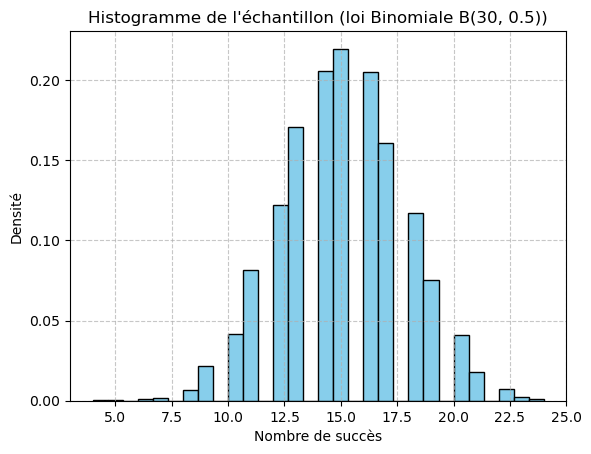

In [132]:
import matplotlib.pyplot as plt

# Histogramme
plt.hist(sample_binomial, bins=30, density=True, color='skyblue', edgecolor='black')
plt.title("Histogramme de l'échantillon (loi Binomiale B(30, 0.5))")
plt.xlabel("Nombre de succès")
plt.ylabel("Densité")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


# **II. LOI NORMALE N(3,0.9)**
### La loi normale est une distribution continue décrite par :
μ=3, la moyenne (valeur centrale).

σ=0.9, l'écart type (dispersion autour de la moyenne).

**Nous allons :**

**1.Simuler un échantillon de 10 000 observations.**

**2.Tracer la densité de l'échantillon.**

In [26]:
# Simulation
mean, std_dev = 3, 0.9
sample_normal = np.random.normal(loc=mean, scale=std_dev, size=10000)


**3.Calculons la densité théorique avec scipy.stats.norm.pdf.**

**4.Puis tracez la densité théorique avec l'histogramme superposé.**

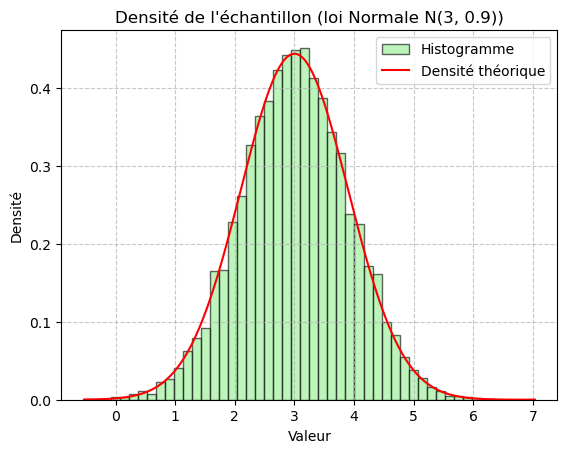

In [29]:
from scipy.stats import norm

# Densité théorique
x_values = np.linspace(min(sample_normal), max(sample_normal), 1000)
pdf_normal = norm.pdf(x_values, loc=mean, scale=std_dev)

# Visualisation
plt.hist(sample_normal, bins=50, density=True, alpha=0.6, color='lightgreen', edgecolor='black', label="Histogramme")
plt.plot(x_values, pdf_normal, color='red', label="Densité théorique")
plt.title("Densité de l'échantillon (loi Normale N(3, 0.9))")
plt.xlabel("Valeur")
plt.ylabel("Densité")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


# **III. Loi χ2 à 20 degrés de liberté**
### La loi du χ2 est une somme des carrés de k variables normales indépendantes standardisées (N(0,1)).
* k=20, degrés de liberté.                 

**Nous allons :**

 **1.Simuler un échantillon de 10 000 observations.**
 
 **2.Et tracer la densité de cet échantillon.**

**Nous avons utiliser la fonction numpy.random.chisquare. pour la sumilation**

In [34]:
# Simulation
degrees_of_freedom = 20
sample_chi2 = np.random.chisquare(df=degrees_of_freedom, size=10000)


**3.Calculer la densité théorique avec scipy.stats.chi2.pdf.**

**4.Tracer la densité théorique avec l'histogramme superposé**

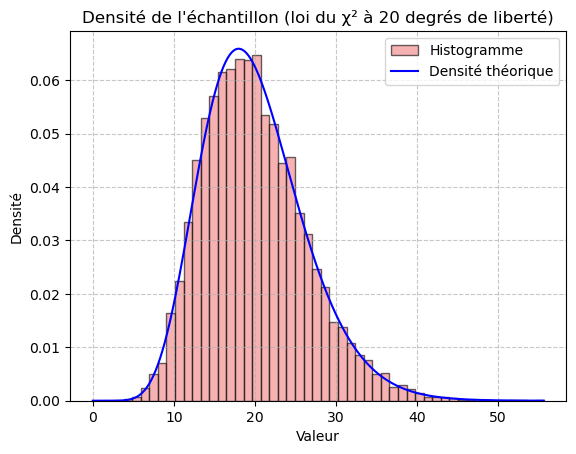

In [39]:
from scipy.stats import chi2

# Densité théorique
x_values_chi2 = np.linspace(0, max(sample_chi2), 1000)
pdf_chi2 = chi2.pdf(x_values_chi2, df=degrees_of_freedom)

# Visualisation
plt.hist(sample_chi2, bins=50, density=True, alpha=0.6, color='lightcoral', edgecolor='black', label="Histogramme")
plt.plot(x_values_chi2, pdf_chi2, color='blue', label="Densité théorique")
plt.title("Densité de l'échantillon (loi du χ² à 20 degrés de liberté)")
plt.xlabel("Valeur")
plt.ylabel("Densité")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


 # **Exercice 2 Méthode de Monte Carlo**


# Estimation de l'intégrale par la méthode de Monte Carlo
La méthode de Monte Carlo est une approche basée sur des simulations aléatoires pour estimer les intégrales. 
Nous allons utiliser cette méthode pour estimer l'intégrale suivante :

$$
I_2 = \int_0^1 \sqrt{1 - x^2} \, dx
$$



Voici les étapes à suivre pour estimer \( I_2 \) par la méthode de Monte Carlo :

1. **Choisir une distribution uniforme sur l'intervalle \( [0, 1] \)** :
   Puisque $ x $ varie de $ 0   $à $  1 $, nous allons tirer $ n $ échantillons aléatoires $ x_i $ dans cet intervalle, où $ n = 10,000  $ 

2. **Calculer les valeurs de la fonction à chaque échantillon** :
   Pour chaque $ x_i  $, nous évaluons la fonction $ f(x_i) = \sqrt{1 - x_i^2} $.

3. **Calculer la moyenne des résultats** :
   La valeur estimée de l'intégrale est alors la moyenne des valeurs de $ f(x_i) $:
$
   [
   I_2 \approx \frac{1}{n} \sum_{i=1}^{n} f(x_i)
   ]
$
4. **Répéter pour différentes valeurs de  n  et observer l'évolution** :
   Nous  répétons ce processus pour différentes valeurs de n  (par exemple  n = 100 à 10000 par pas de 100 ) et observer l'évolution de l'estimation. L'estimation  converge vers la valeur théorique $ \frac{\pi}{4}$.

## Implémentation en Python

Code Python pour effectuer cette estimation par la méthode de Monte Carlo avec \( n = 10,000 \) et afficher l'évolution pour différentes tailles de n.

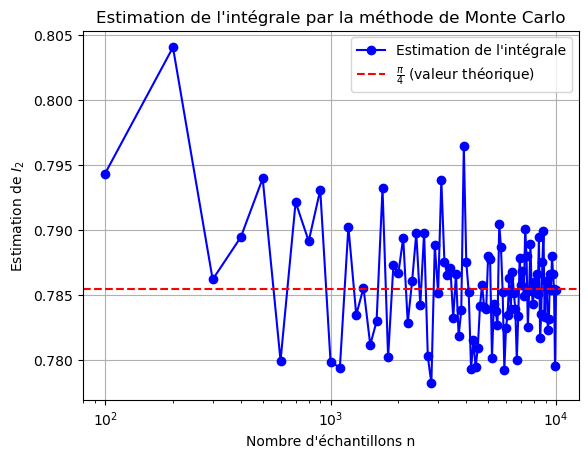

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction à intégrer
def f(x):
    return np.sqrt(1 - x**2)

# Estimation de l'intégrale par Monte Carlo
def monte_carlo(n):
    # Tirage de n échantillons uniformes sur [0, 1]
    x = np.random.uniform(0, 1, n)
    # Calcul de la moyenne des valeurs de la fonction f(x)
    return np.mean(f(x))

# Plage de valeurs pour n, de 100 à 10,000
n_values = np.arange(100, 10001, 100)  # n varie de 100 à 10,000 avec un pas de 100
estimates = []

# Estimation pour chaque valeur de n
for n in n_values:
    estimate = monte_carlo(n)
    estimates.append(estimate)

# Valeur théorique de l'intégrale
theoretical_value = np.pi / 4

# Tracer les résultats
plt.plot(n_values, estimates, label="Estimation de l'intégrale", marker='o', color='b')
plt.axhline(y=theoretical_value, color='r', linestyle='--', label=r"$\frac{\pi}{4}$ (valeur théorique)")
plt.xlabel('Nombre d\'échantillons n')
plt.ylabel('Estimation de $I_2$')
plt.title('Estimation de l\'intégrale par la méthode de Monte Carlo')
plt.legend()
plt.grid(True)
plt.xscale('log')  # Échelle logarithmique pour l'axe des x
plt.show()


#  **Exercice 3**


# 1) Enregistrement des données pour une lecture avec python

In [57]:
import numpy as np
x = np.array([18, 7, 14, 31, 21, 5, 11, 16, 26, 29])
y = np.array([55, 17, 36, 85, 62, 18, 33, 41, 63, 87])


# 2) Representation des $ x_i $ en fonction des $ y_i $

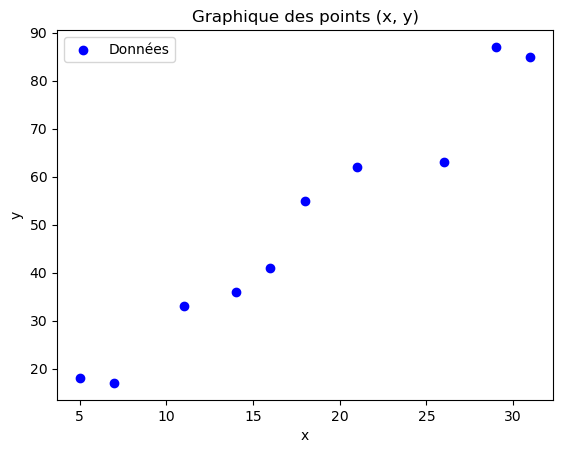

In [66]:
import matplotlib.pyplot as plt

plt.scatter(x, y, color='blue', label='Données')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graphique des points (x, y)')
plt.legend()
plt.show()


# Oui il semble y avoir une liaison entre $ x $ et $ y $.

# 3) Détérminons pour ces observations la droite des moindres carrés

In [69]:
#Calcul des coefficients
b = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x))**2)
a = np.mean(y) - b * np.mean(x)

print(f"Les coefficients de la droite des moindres carrés sont : a = {a:.2f}, b = {b:.2f}")


Les coefficients de la droite des moindres carrés sont : a = 1.02, b = 2.73


# 4) Donnons les ordonnées des $y_i $ calculés par la droite des moindres carrés correspondantes aux differentes valeurs de $ x_i $.

In [72]:
#Calcul des valeurs estimées
y_estimated = a + b * x

print("Les ordonnées estimées sont :", y_estimated)


Les ordonnées estimées sont : [50.24695122 20.16463415 39.30792683 85.79878049 58.45121951 14.69512195
 31.10365854 44.77743902 72.125      80.32926829]


# 5) Question 5: Traçons la droite de régression

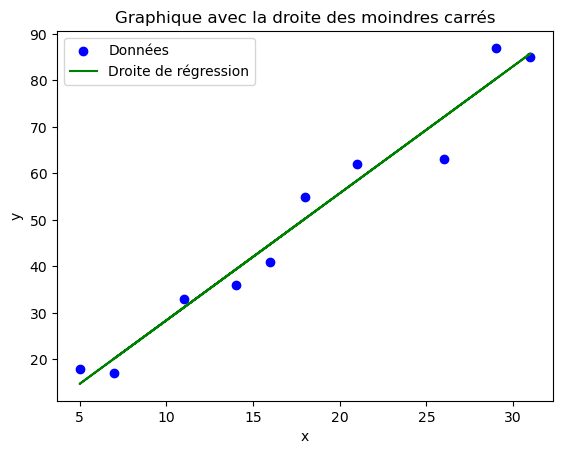

In [75]:
plt.scatter(x, y, color='blue', label='Données')
plt.plot(x, y_estimated, color='green', label='Droite de régression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graphique avec la droite des moindres carrés')
plt.legend()
plt.show()


# 6) Estimation de Y a x=21

In [78]:
x_value = 21
y_prediction = a + b * x_value

print(f"L'estimation de Y pour x = 21 est : {y_prediction:.2f}")

L'estimation de Y pour x = 21 est : 58.45


# 7) Calculons l'écart entre la valeur observée de $ Y $ à $ x_i $ =21  et la valeur estimée avec la droite des moindrs carrés

In [81]:

#Valeur observée pour x = 21
y_observed = y[np.where(x == 21)][0]  # On trouve la valeur de y où x = 21
residual = y_observed - y_prediction

print(f"Écart entre la valeur observée et la valeur estimée à x = 21 : {residual:.2f}")


Écart entre la valeur observée et la valeur estimée à x = 21 : 3.55


# Cet écart est appelé résidu.

# 8) Vérifions si la droite des moindre carres passe par le point  $(x_,y_)$

In [85]:
mean_x = np.mean(x)
mean_y = np.mean(y)
y_mean_line = a + b * mean_x

print(f"La valeur de la droite au point moyen (\u0304x, \u0304y) est : {y_mean_line:.2f}")
print(f"La moyenne de y est : {mean_y:.2f}")
print("Oui la droite des moindres carres obtenue en 2 passe par le point (\u0304x,\u0304y).")


La valeur de la droite au point moyen (̄x, ̄y) est : 49.70
La moyenne de y est : 49.70
Oui la droite des moindres carres obtenue en 2 passe par le point (̄x,̄y).


# Oui on peut generaliser cette conclusion a n'importe laquelle droite de regression car c'est une propriété fondamentale de la régression linéaire simple.

# **Exercice 4 (Données covid-19 Sénégal)**


# Installation des blibliotheques necessaires

In [92]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [95]:
pip install fiona

Note: you may need to restart the kernel to use updated packages.


# Importer les blibliotheques

In [98]:
import pandas as pd
import unidecode
import pandas as pd 
import geopandas as gpd   
import matplotlib.pyplot as plt 
import unicodedata 
import numpy as np
import seaborn as sns
import fiona as f
import csv

# 1) Lire les données dans Python.On créera un dataframe contenant les variables suivantes:date,region et malades. On supprimera les accents et les ".". En suite seule la première lettre du mot sera en majuscule.(par exemple on remplace THIÈS par Thies, KÉDOUGOU par Kédougou).

In [102]:
# Lire le fichier CSV
df = pd.read_csv("regions_cas.csv")

# Affichage des premières lignes pour vérification
df.head()


,DATE,DAKAR,DIOURBEL,FATICK,KAFFRINE,KAOLACK,KÉDOUGOU,KOLDA,LOUGA,MATAM,SAINT LOUIS,SÉDHIOU,TAMBACOUNDA,THIÈS,ZIGUINCHOR
0,2020-03-29,85,26,1,0,0,0,0,0,0,2,0,0,24,3
1,2020-03-31,117,26,1,0,0,0,0,0,0,2,0,0,26,3
2,2020-04-01,131,26,1,0,0,0,0,0,0,3,0,0,26,3
3,2020-04-02,136,26,1,0,0,0,0,0,0,3,0,0,26,3
4,2020-04-03,140,26,1,0,0,0,7,0,0,3,0,1,26,3


# 2. Convertir la variable date en type datetime, et supprimer toutes les lignes ayant des valeurs manquantes (s’il en existe).

# 3. Créer une fonction qui retourne un dataframe à 3 colonnes (date, region, maladesparegion). La dernière colonne contiendra le nombre de malades de covid-19 par régions aux différentes dates données.


In [104]:

regions_cas=df = pd.read_csv("regions_cas.csv")

    # Creation d'une Fonction qui supprimera les accents et les "." et de facon a ce que la première lettre du mot soit en majuscule
def supprimer(noms):
     nettoyage = ''.join( 
        char for char in unicodedata.normalize('NFD', noms) if unicodedata.category(char) != 'Mn').replace('.', '').lower().capitalize()
     return nettoyage

# Fonction principale pour lire et transformer les données
def donnes(regions_cas):
        # Charger le fichier Excel
        conversion = pd.read_csv("regions_cas.csv")
        
        # Convertir  la variable date en type datetime 
        conversion['DATE'] = pd.to_datetime(conversion['DATE'], errors='coerce')
        
        # Restructurer les données en format long
        format_long = pd.melt(conversion, id_vars='DATE', var_name='region', value_name='malades par region')
        
        # Appliquer la fonction de nettoyage aux noms des régions
        format_long['region'] = format_long['region'].apply(supprimer)
        
        # Supprimer les lignes avec des valeurs manquantes
        format_long.dropna(inplace=True)
        format_long = format_long[format_long['malades par region'] != 0]

        # Renommer la colonne 'DATE' en 'date' pour correspondre au format attendu
        format_long = format_long.groupby(['DATE', 'region']).sum().reset_index()

        
        return format_long

resultat = donnes(regions_cas)

print(resultat.head(400))


          DATE       region  malades par region
0   2020-03-29        Dakar                  85
1   2020-03-29     Diourbel                  26
2   2020-03-29       Fatick                   1
3   2020-03-29  Saint louis                   2
4   2020-03-29        Thies                  24
..         ...          ...                 ...
395 2020-05-13      Sedhiou                  90
396 2020-05-13  Tambacounda                  76
397 2020-05-13        Thies                 124
398 2020-05-13   Ziguinchor                  17
399 2020-05-14        Dakar                1449

[400 rows x 3 columns]


# 4. Supposons que la variable maladesparegion suit une loi de Poisson de paramètre λ. Estimer λ.


In [118]:
Lambda = resultat['malades par region'].mean()

print(f" λ est egale a : {Lambda}")

 λ est egale a : 588.9494283201407


### **5. Estimation des fréquences théoriques avec la loi de Poisson**

Une fois que vous avez calculé λ, vous pouvez utiliser la loi de Poisson pour estimer les fréquences théoriques.
La loi de Poisson est utilisée pour modéliser le nombre d'événements qui se produisent dans un intervalle de temps fixe, 
sachant que les événements se produisent à un taux constant.

Voici le code pour calculer les fréquences théoriques et les comparer avec les fréquences observées :

C:\Users\toshiba\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:8064: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp
C:\Users\toshiba\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:8064: RuntimeWarning: overflow encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp


Statistique du Chi-carré : inf
Valeur p : 0.0
Il y a une différence significative entre les fréquences observées et théoriques. La variable ne suit pas une loi de Poisson.


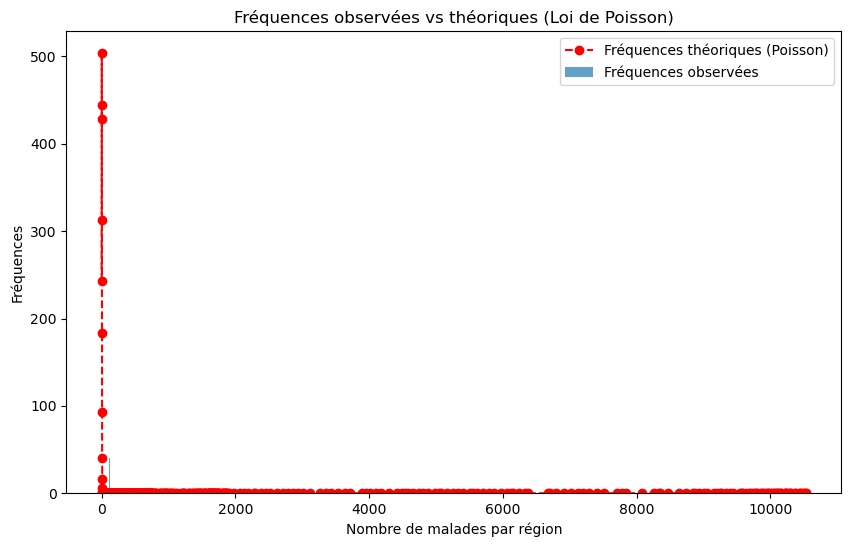

In [136]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import unicodedata

# Charger les données depuis un fichier Excel
df = pd.read_csv("regions_cas.csv")  # Remplacez par le bon chemin si nécessaire

# Fonction pour supprimer les accents, les points et mettre la première lettre en majuscule
def supprimer(noms):
    nettoyage = ''.join(
        char for char in unicodedata.normalize('NFD', noms) if unicodedata.category(char) != 'Mn'
    ).replace('.', '').lower().capitalize()
    return nettoyage

# Fonction principale pour lire et transformer les données
def donnes(df):
    # Convertir la colonne 'DATE' en format datetime
    df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

    # Restructurer les données en format long (melt)
    format_long = pd.melt(df, id_vars='DATE', var_name='region', value_name='malades par region')

    # Appliquer la fonction de nettoyage aux noms des régions
    format_long['region'] = format_long['region'].apply(supprimer)

    # Supprimer les lignes avec des valeurs manquantes et les régions avec 0 malades
    format_long.dropna(inplace=True)
    format_long = format_long[format_long['malades par region'] != 0]

    # Renommer la colonne 'DATE' en 'date' pour correspondre au format attendu
    format_long = format_long.groupby(['DATE', 'region']).sum().reset_index()

    return format_long

# Appliquer la fonction et obtenir le résultat
resultat = donnes(df)

# Calcul des fréquences observées pour les malades par région
observed_counts = resultat['malades par region'].value_counts().sort_index()

# 3. Calcul des fréquences théoriques selon la loi de Poisson
# Estimation du paramètre Lambda de la loi de Poisson
Lambda = observed_counts.mean()  # Lambda est la moyenne des fréquences observées

# Calculer les probabilités de Poisson pour les catégories observées
poisson_probabilities = stats.poisson.pmf(observed_counts.index, Lambda)

# Calcul des fréquences théoriques
theoretical_counts = poisson_probabilities * len(resultat)

# Vérification des sommes des fréquences observées et théoriques
observed_sum = observed_counts.sum()
theoretical_sum = theoretical_counts.sum()

# Ajustement des fréquences théoriques pour que la somme corresponde à la somme des fréquences observées
theoretical_counts = theoretical_counts * (observed_sum / theoretical_sum)

# S'assurer que la somme des fréquences observées et théoriques est égale
observed_counts = observed_counts.sort_index()  # Trier pour garantir l'alignement
theoretical_counts = theoretical_counts[:len(observed_counts)]  # Couper les fréquences théoriques pour correspondre

# 4. Effectuer le test du Chi-carré pour comparer les fréquences observées et théoriques
chi2_stat, p_value = stats.chisquare(observed_counts.values, theoretical_counts)

# Affichage du résultat du test
print(f"Statistique du Chi-carré : {chi2_stat}")
print(f"Valeur p : {p_value}")

# Interpréter les résultats
alpha = 0.05  # Seuil de significativité (5%)
if p_value < alpha:
    print("Il y a une différence significative entre les fréquences observées et théoriques. La variable ne suit pas une loi de Poisson.")
else:
    print("Aucune différence significative entre les fréquences observées et théoriques. La variable pourrait suivre une loi de Poisson.")

# 5. Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.bar(observed_counts.index, observed_counts.values, label='Fréquences observées', alpha=0.7)
plt.plot(observed_counts.index, theoretical_counts, label='Fréquences théoriques (Poisson)', color='r', linestyle='--', marker='o')
plt.xlabel('Nombre de malades par région')
plt.ylabel('Fréquences')
plt.legend()
plt.title('Fréquences observées vs théoriques (Loi de Poisson)')
plt.show()


# 6. Supposons que la variable maladesparegion suit une loi de Binomiale négative de paramètres r et p. Estimer r et p.

In [120]:
# Calcul de la moyenne et de la variance des données
moyenne = np.mean(resultat["malades par region"])
var = np.var(resultat["malades par region"])

# Estimation des paramètres p et r
p = moyenne / var
r = moyenne**2 / (var - moyenne)

print("l'estimation de p est :", p)
print("l'estimation de r est :", r)

l'estimation de p est : 0.00018963518303562077
l'estimation de r est : 0.11170671616177973


# 7. Créer une fonction CarteRegions(madate) qui affiche la carte choroplèthe des régions en utilisant le nombre de malades.(Vous pouvez télécharger les coordonnées géographiques du Sénégal dans le site https://gadm.org/data.html )

In [122]:
chemin_carte = r'C:\Users\toshiba\Desktop\Donnes\SHP\gadm41_SEN_1.shp'

carte_sn = gpd.read_file(chemin_carte)

carte_sn.head(14)


,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,SEN.1_1,SEN,Senegal,Dakar,Cap Vert|Dacar,NA,Région,Region,1,SN.DK,SN-DK,"MULTIPOLYGON (((-17.46764 14.64874, -17.46764 ..."
1,SEN.2_1,SEN,Senegal,Diourbel,NA,NA,Région,Region,3,SN.DB,SN-DB,"MULTIPOLYGON (((-16.04326 14.555, -16.04513 14..."
2,SEN.3_1,SEN,Senegal,Fatick,NA,NA,Région,Region,9,SN.FK,SN-FK,"MULTIPOLYGON (((-16.65347 13.64736, -16.65347 ..."
3,SEN.4_1,SEN,Senegal,Kaffrine,NA,NA,Région,Region,12,SN.KF,SN-KA,"POLYGON ((-15.39492 13.75729, -15.39724 13.754..."
4,SEN.5_1,SEN,Senegal,Kaolack,NA,NA,Région,Region,6,SN.KC,SN-KL,"POLYGON ((-15.99889 13.59169, -15.9991 13.5916..."
5,SEN.6_1,SEN,Senegal,Kedougou,Sénégal Oriental,NA,Région,Region,13,SN.KG,NA,"POLYGON ((-12.18896 12.36092, -12.18988 12.359..."
6,SEN.7_1,SEN,Senegal,Kolda,NA,NA,Région,Region,10,SN.KD,SN-KD,"POLYGON ((-14.87927 12.67908, -14.89042 12.679..."
7,SEN.8_1,SEN,Senegal,Louga,NA,NA,Région,Region,8,SN.LG,SN-LG,"POLYGON ((-14.89964 14.69065, -14.90496 14.696..."
8,SEN.9_1,SEN,Senegal,Matam,NA,NA,Région,Region,11,SN.MT,SN-MT,"POLYGON ((-12.84595 15.19942, -12.84217 15.198..."
9,SEN.10_1,SEN,Senegal,Saint-Louis,Fleuve|Vallée du Fleuve,NA,Région,Region,4,SN.ST,SN-SL,"POLYGON ((-13.96464 16.22396, -13.96242 16.225..."


In [126]:
nombre_malades = resultat.groupby('region')['malades par region'].sum().reset_index()
print(nombre_malades)


fichier_final = carte_sn.merge(nombre_malades, on=nombre_malades['region'])

fichier_final.head()

         region  malades par region
0         Dakar              953732
1      Diourbel               88063
2        Fatick               11228
3      Kaffrine                1357
4       Kaolack               17118
5      Kedougou               10267
6         Kolda               18133
7         Louga                7868
8         Matam                6272
9   Saint louis               16844
10      Sedhiou               18538
11  Tambacounda               14311
12        Thies              135570
13   Ziguinchor               39970


,key_0,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,region,malades par region
0,Dakar,SEN.1_1,SEN,Senegal,Dakar,Cap Vert|Dacar,NA,Région,Region,1,SN.DK,SN-DK,"MULTIPOLYGON (((-17.46764 14.64874, -17.46764 ...",Dakar,953732
1,Diourbel,SEN.2_1,SEN,Senegal,Diourbel,NA,NA,Région,Region,3,SN.DB,SN-DB,"MULTIPOLYGON (((-16.04326 14.555, -16.04513 14...",Diourbel,88063
2,Fatick,SEN.3_1,SEN,Senegal,Fatick,NA,NA,Région,Region,9,SN.FK,SN-FK,"MULTIPOLYGON (((-16.65347 13.64736, -16.65347 ...",Fatick,11228
3,Kaffrine,SEN.4_1,SEN,Senegal,Kaffrine,NA,NA,Région,Region,12,SN.KF,SN-KA,"POLYGON ((-15.39492 13.75729, -15.39724 13.754...",Kaffrine,1357
4,Kaolack,SEN.5_1,SEN,Senegal,Kaolack,NA,NA,Région,Region,6,SN.KC,SN-KL,"POLYGON ((-15.99889 13.59169, -15.9991 13.5916...",Kaolack,17118


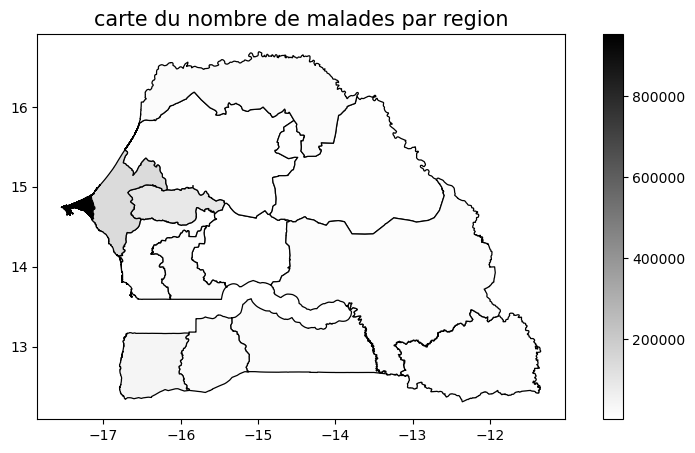

In [128]:
def  carte_senegal(fichier_final):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    fichier_final.plot(column='malades par region', cmap='gray_r', linewidth=0.9, ax=ax, edgecolor="black", legend=True)
    ax.set_title("carte du nombre de malades par region", fontdict={'fontsize': 15})

    plt.show()
carte_senegal(fichier_final)